# 1. Definição do problema

<h3>COMO PODEMOS TRAÇAR PERFIS QUE NOS AJUDEM A CUIDAR AINDA MELHOR DOS NOSSOS BENEFICIÁRIOS?</H3>

<p>Tem-se um conjunto de dados de usuários de seguro saúde com os respectivos eventos de saúde listados por competência. (dados/despesas_medicas.csv)

O objetivo é identificar perfis agrupando os dados de saúde de diferentes formas.</p>

In [22]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os
%matplotlib inline
from sklearn.cluster import KMeans

In [23]:
# Este arquivo contém as despesas médicas de 5.000 beneficiários no decorrer de 3 anos.
# As linhas abaixo importam esse dataset.
dt_despesas_medicas = pd.read_csv("dados/despesas_medicas.csv", sep=',')
dt_despesas_medicas.head()

,CNAE_ID,PACIENTE_ID,SEXO,ANO_NASCIMENTO,COMPET,CID,PROCEDIMENTO_ID,QTD,VLR_TOTAL
0,1052000,3724852462,M,1934,102017,R53,90211111,5.0,1.26
1,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00
2,NaN,762205882,F,1924,92017,NaN,75208229,1.0,0.66
3,NaN,652221324,M,1928,92017,NaN,75208229,2.0,1.32
4,NaN,723684431,F,2005,32017,J961,75208229,100.0,3.00


In [24]:
dt_despesas_medicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840660 entries, 0 to 1840659
Data columns (total 9 columns):
CNAE_ID            object
PACIENTE_ID        int64
SEXO               object
ANO_NASCIMENTO     int64
COMPET             int64
CID                object
PROCEDIMENTO_ID    int64
QTD                float64
VLR_TOTAL          float64
dtypes: float64(2), int64(4), object(3)
memory usage: 126.4+ MB


In [25]:
# Aqui temos datasets que complementam as descrições dos procedimentos.
# Esse primeiro temos a descrição do procedimento.
dt_p = pd.read_csv("dados/procedimentos.csv")
# Esse possui a classificação do procedimento
dt_p_classificacao = pd.read_csv("dados/procedimentos_classificacao.csv")
# Esse possui o grupo de procedimento
dt_p_grupos = pd.read_csv("dados/procedimentos_grupos.csv")
# Esses três dados formam uma classificação hierarquizada

#dt_p.head()
#dt_p_classificacao.head()
#dt_p_grupos.head()

# Aqui agrupo os 3 datasets referente à classificação dos procedimentos em um só
dt_procedimentos = pd.merge(dt_p, dt_p_classificacao, how='left', on=['CLPROCED_ID', 'CLPROCED_ID'])
dt_procedimentos = pd.merge(dt_procedimentos, dt_p_grupos, how='left', on=['GRPROCED_ID', 'GRPROCED_ID'])
#dt_procedimentos_classificacao.head()
dt_procedimentos.head()
#Veja as primeiras linhas dele abaixo

,PROCEDIMENTO_ID,PROCEDIMENTO_NOME,CLPROCED_ID,CLPROCED_NOME,GRPROCED_ID,GRPROCED_NOME
0,30301017,ABSCESSO DE PALPEBRA - DRENAGEM,213,tratamento cirurgico,4,Terapias
1,30101298,ELETROCOAGULACAO DE LESOES DE PELE E MUCOSAS -...,213,tratamento cirurgico,4,Terapias
2,70877777,ENTRIFLEX SONDA PARA ALIMENTACAO ENTERAL NAO E...,11,materiais,3,Outros
3,40304116,ENZIMAS ERITROCITARIAS- (ADENILATOQUINASE- DES...,250,medicina laboratorial,2,Exames
4,90032527,DEXPANTENOL - EPITEGEL 50 MG/G GEL OFT CT BG P...,12,medicamentos,3,Outros


In [26]:
# Aqui temos os datasets para classificação dos cids
# Esse possui a descrição do cid (cadastro de doença)
dt_c = pd.read_csv("dados/cids.csv")
# Esse é um dataset para agrupamento de cids
dt_c_grupos = pd.read_csv("dados/cids_grupos.csv")

#dt_cids.head()
#dt_cids_grupos.head()

# Aqui agupo os 2 datasets referentes à classificação dos cids
dt_cids = pd.merge(dt_c, dt_c_grupos, how='left', on=['CIDGRUPO_ID', 'CIDGRUPO_ID'])
dt_cids.head()

,CID,DESCRICAO,CIDGRUPO_ID,CIDGRUPO_CODIGO,CIDGRUPO_NOME
0,I64,ACIDENTE VASCULAR CEREBRAL NAO ESPECIFICADO CO...,47,I60-I69,Doenças cerebrovasculares
1,R522,OUTRA DOR CRONICA,140,R50-R69,Sintomas e sinais gerais
2,M255,DOR ARTICULAR,82,M20-M25,Outros transtornos articulares
3,J180,BRONCOPNEUMONIA NAO ESPECIFICADA,52,J10-J18,Influenza [gripe] e pneumonia
4,J960,INSUFICIENCIA RESPIRATORIA AGUDA,60,J95-J99,Outras doenças do aparelho respiratório


In [27]:
# Aqui o dataset com as descrições das ocupações
dt_cnaes = pd.read_csv("dados/cnaes.csv")
dt_cnaes.head()

,CNAE_ID,CNAE_DESCRICAO
0,0111301,Cultivo de arroz
1,0111302,Cultivo de milho
2,0111303,Cultivo de trigo
3,0111399,Cultivo de outros cereais não especificados an...
4,0112101,Cultivo de algodão herbáceo


In [28]:
# Esse dataset seria a junção do dataset principal (despesas_medicas) com os datasets auxiliares fornecidos
# Esse pode ser o seu ponto de partida
dt_despesas = pd.merge(dt_despesas_medicas, dt_procedimentos, how='left', on=['PROCEDIMENTO_ID', 'PROCEDIMENTO_ID'])
dt_despesas = pd.merge(dt_despesas, dt_cids, how='left', on=['CID', 'CID'])
dt_despesas = pd.merge(dt_despesas, dt_cnaes, how='left', on=['CNAE_ID', 'CNAE_ID'])

dt_despesas.head()
#dt_despesas_1.info()

,CNAE_ID,PACIENTE_ID,SEXO,ANO_NASCIMENTO,COMPET,CID,PROCEDIMENTO_ID,QTD,VLR_TOTAL,PROCEDIMENTO_NOME,CLPROCED_ID,CLPROCED_NOME,GRPROCED_ID,GRPROCED_NOME,DESCRICAO,CIDGRUPO_ID,CIDGRUPO_CODIGO,CIDGRUPO_NOME,CNAE_DESCRICAO
0,1052000,3724852462,M,1934,102017,R53,90211111,5.0,1.26,VARFARINA SODICA 5 MG COM CT STR AL X 30,12.0,medicamentos,3.0,Outros,MAL ESTAR FADIGA,140.0,R50-R69,Sintomas e sinais gerais,Fabricação de laticínios
1,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00,ABAIXADOR DE LINGUA,11.0,materiais,3.0,Outros,NaN,NaN,NaN,NaN,NaN
2,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00,ABAIXADOR DE LINGUA,11.0,materiais,3.0,Outros,NaN,NaN,NaN,NaN,NaN
3,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00,ABAIXADOR DE LINGUA,11.0,materiais,3.0,Outros,NaN,NaN,NaN,NaN,NaN
4,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00,ABAIXADOR DE LINGUA,11.0,materiais,3.0,Outros,NaN,NaN,NaN,NaN,NaN


Daqui em diante são expostos exemplos de pré-tratamentos que podem ser utilizados para mudar a estrutura do dataset principal.

In [29]:
# Aqui apenas transformamos o campo COMPET (competência) criando duas novas features,
# sendo uma já tipada como data (DATA_REF_EVENTO) e outra com o ano apenas (ANO_REF_EVENTO)
dt_despesas['DATA_REF_EVENTO'] = pd.to_datetime( dt_despesas['COMPET'] , format='%m%Y')
dt_despesas['ANO_REF_EVENTO'] = pd.to_datetime(dt_despesas['DATA_REF_EVENTO']).apply(lambda x: x.strftime('%Y'))
dt_despesas.head()

,CNAE_ID,PACIENTE_ID,SEXO,ANO_NASCIMENTO,COMPET,CID,PROCEDIMENTO_ID,QTD,VLR_TOTAL,PROCEDIMENTO_NOME,...,CLPROCED_NOME,GRPROCED_ID,GRPROCED_NOME,DESCRICAO,CIDGRUPO_ID,CIDGRUPO_CODIGO,CIDGRUPO_NOME,CNAE_DESCRICAO,DATA_REF_EVENTO,ANO_REF_EVENTO
0,1052000,3724852462,M,1934,102017,R53,90211111,5.0,1.26,VARFARINA SODICA 5 MG COM CT STR AL X 30,...,medicamentos,3.0,Outros,MAL ESTAR FADIGA,140.0,R50-R69,Sintomas e sinais gerais,Fabricação de laticínios,2017-10-01,2017
1,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00,ABAIXADOR DE LINGUA,...,materiais,3.0,Outros,NaN,NaN,NaN,NaN,NaN,2018-08-01,2018
2,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00,ABAIXADOR DE LINGUA,...,materiais,3.0,Outros,NaN,NaN,NaN,NaN,NaN,2018-08-01,2018
3,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00,ABAIXADOR DE LINGUA,...,materiais,3.0,Outros,NaN,NaN,NaN,NaN,NaN,2018-08-01,2018
4,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00,ABAIXADOR DE LINGUA,...,materiais,3.0,Outros,NaN,NaN,NaN,NaN,NaN,2018-08-01,2018


In [30]:
# Aqui é realizado um agrupamento no dataset de forma a ter o valor da depesa por mês, por beneficiário
dt_despesas_agrupado_por_mes = dt_despesas.groupby(['PACIENTE_ID','SEXO','ANO_NASCIMENTO','DATA_REF_EVENTO'], as_index=False)['VLR_TOTAL'].sum()
dt_despesas_agrupado_por_mes.head()

,PACIENTE_ID,SEXO,ANO_NASCIMENTO,DATA_REF_EVENTO,VLR_TOTAL
0,740255,F,1952,2016-02-01,1471.80
1,740255,F,1952,2016-07-01,8616.60
2,740255,F,1952,2016-08-01,1312.80
3,740255,F,1952,2016-09-01,2653.02
4,740255,F,1952,2016-10-01,479.94


In [31]:
# Aqui é realizado um agrupamento no dataset de forma a ter o valor da depesa por ano, por beneficiário
dt_despesas_agrupado_por_ano = dt_despesas.groupby(['PACIENTE_ID','SEXO','ANO_NASCIMENTO','ANO_REF_EVENTO'],  as_index=False)['VLR_TOTAL'].sum()
dt_despesas_agrupado_por_ano.head()

,PACIENTE_ID,SEXO,ANO_NASCIMENTO,ANO_REF_EVENTO,VLR_TOTAL
0,740255,F,1952,2016,22346.04
1,740255,F,1952,2017,5259.60
2,740255,F,1952,2018,515270.64
3,1462618,F,1937,2016,15698.28
4,1462618,F,1937,2017,24771.06


In [32]:
dt_despesas_medicas.head()

,CNAE_ID,PACIENTE_ID,SEXO,ANO_NASCIMENTO,COMPET,CID,PROCEDIMENTO_ID,QTD,VLR_TOTAL
0,1052000,3724852462,M,1934,102017,R53,90211111,5.0,1.26
1,NaN,4214008789,F,1920,82018,NaN,75208229,2.0,0.00
2,NaN,762205882,F,1924,92017,NaN,75208229,1.0,0.66
3,NaN,652221324,M,1928,92017,NaN,75208229,2.0,1.32
4,NaN,723684431,F,2005,32017,J961,75208229,100.0,3.00


In [33]:
df = dt_despesas_medicas.groupby('PROCEDIMENTO_ID').count()
df['paciente_count'] = dt_despesas_medicas.iloc[:,[1,5,6]].groupby('PROCEDIMENTO_ID').nunique().iloc[:,0]
df['procedimento_count'] = dt_despesas_medicas.iloc[:,[1,5,6]].groupby('PROCEDIMENTO_ID').nunique().iloc[:,1]
df['qtd'] = dt_despesas_medicas.iloc[:,[6,7,8]].groupby('PROCEDIMENTO_ID').sum().iloc[:,0]
df['valor'] = dt_despesas_medicas.iloc[:,[6,7,8]].groupby('PROCEDIMENTO_ID').sum().iloc[:,1]
df = df.iloc[:,[-1,-2,-3,-4]]

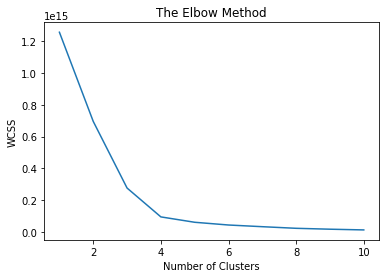

In [34]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init = 'k-means++', 
                    max_iter = 300, n_init = 10, 
                    random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
df = dt_despesas_medicas.groupby('PACIENTE_ID').count()
df['procedimento_count'] = dt_despesas_medicas.iloc[:,[1,6]].groupby('PACIENTE_ID').nunique().iloc[:,0]
df['qtd'] = dt_despesas_medicas.iloc[:,[1,7,8]].groupby('PACIENTE_ID').sum().iloc[:,0]
df['valor'] = dt_despesas_medicas.iloc[:,[1,7,8]].groupby('PACIENTE_ID').sum().iloc[:,1]
df = df.iloc[:,[-1,-2,-3]]

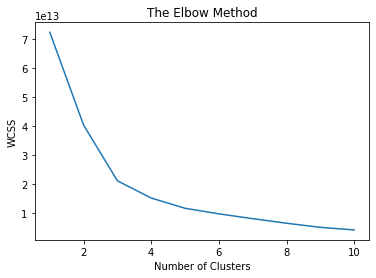

In [36]:
df = dt_despesas_medicas.groupby('PACIENTE_ID').count()
df['procedimento_count'] = dt_despesas_medicas.iloc[:,[1,6]].groupby('PACIENTE_ID').nunique().iloc[:,0]
df['qtd'] = dt_despesas_medicas.iloc[:,[1,7,8]].groupby('PACIENTE_ID').sum().iloc[:,0]
df['valor'] = dt_despesas_medicas.iloc[:,[1,7,8]].groupby('PACIENTE_ID').sum().iloc[:,1]
df = df.iloc[:,[-1,-2,-3]]
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init = 'k-means++', 
                    max_iter = 300, n_init = 10, 
                    random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

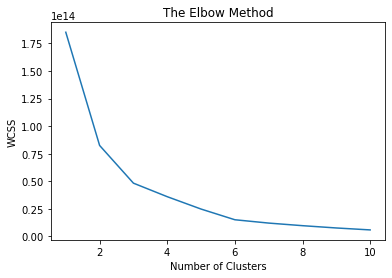

In [37]:
df = dt_despesas_medicas.groupby('CID').count()
df['procedimento_count'] = dt_despesas_medicas.iloc[:,[5,6]].groupby('CID').nunique().iloc[:,0]
df['qtd'] = dt_despesas_medicas.iloc[:,[5,7,8]].groupby('CID').sum().iloc[:,0]
df['valor'] = dt_despesas_medicas.iloc[:,[5,7,8]].groupby('CID').sum().iloc[:,1]
df = df.iloc[:,[-1,-2,-3]]

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, 
                    init = 'k-means++', 
                    max_iter = 300, n_init = 10, 
                    random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
df = dt_despesas.iloc[:,[1,2,3,7,8,9,11,16]]

In [65]:
df.iloc[:,[0,5]].columns

Index(['PACIENTE_ID', 'PROCEDIMENTO_NOME'], dtype='object')

In [66]:
df_m = df.iloc[:,[0,5]]

In [ ]:
pd.get_dummies(df_m['PROCEDIMENTO_NOME']).head()